<a href="https://colab.research.google.com/github/mnishio240/laserscar/blob/main/Patient1%E3%81%AE%E8%87%AA%E7%99%BA%E8%9B%8D%E5%85%89%E5%AD%A6%E7%BF%92%E7%B5%90%E6%9E%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division
# !pip install torch_optimizer

import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.models as models
import torch
import torch.nn as nn
#import torch_optimizer as optim
import torch.utils.data as data
import numpy as np
import torchvision
from torchvision import datasets, models
import torchvision.transforms.v2 as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import os
import copy
import math
import shutil
import csv
import pandas as pd
import glob
from PIL import Image
from torch.cuda.amp import autocast, GradScaler


#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

#あればGPUを使用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
!nvidia-smi -L

#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')



GPU 0: Tesla T4 (UUID: GPU-039504dc-70da-dce7-8155-835b0eb72471)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# zip fileを解凍。/content/imagesへ。

import zipfile
zip_parent_path = "/content/drive/MyDrive"
zip_name = ["Patient_1_Cropped.zip", "Patient13R_Cropped.zip"]
extract_path = "/content/images"

for zip_file in zip_name:
  zip_file_path = os.path.join(zip_parent_path, zip_file)
  try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_path)
    print(f"Successfully extracted {zip_file} to {extract_path}")
  except FileNotFoundError:
    print(f"Error: {zip_file} not found at {zip_file_path}")
  except zipfile.BadZipFile:
    print(f"Error: {zip_file} is not a valid zip file.")
  except Exception as e:
    print(f"An unexpected error occurred while extracting {zip_file}: {e}")


Error: Patient_1_Cropped.zip not found at /content/drive/MyDrive/Deep_learning/PCAF_AI_Project/Cropped_images/Patient_1_Cropped.zip
Error: Patient13R_Cropped.zip not found at /content/drive/MyDrive/Deep_learning/PCAF_AI_Project/Cropped_images/Patient13R_Cropped.zip


In [ ]:
csv_path = "/content/drive/MyDrive/Pixel_ComparisonPatient1auto1.5Mto2Y_Tracks_1_to_1004.csv"
cropped_img_dir = "/content/drive/MyDrive/Patient_1_Cropped"

#Patientとphaseを指定して画像を抜き出し
first_characters = "pt1_5_1.5M"

df = pd.read_csv(csv_path)
filtered_df = df[df["File Prefix1"].str.startswith(first_characters)]

filtered_df.head()

,Track Number,File Prefix1,File Prefix2,Pixels Prefix1,Pixels Prefix2,Ratio
0,1,pt1_5_1.5M_AF_label0_track1.png,pt1_6_2Y_AF_label0_track1.png,396,1020,2.575758
1,2,pt1_5_1.5M_AF_label0_track2.png,pt1_6_2Y_AF_label0_track2.png,896,810,0.904018
2,3,pt1_5_1.5M_AF_label0_track3.png,pt1_6_2Y_AF_label0_track3.png,456,864,1.894737
3,4,pt1_5_1.5M_AF_label0_track4.png,pt1_6_2Y_AF_label0_track4.png,972,864,0.888889
4,5,pt1_5_1.5M_AF_label0_track5.png,pt1_6_2Y_AF_label0_track5.png,506,506,1.000000


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Track Number'].plot(kind='hist', bins=20, title='Track Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pixels Prefix1'].plot(kind='hist', bins=20, title='Pixels Prefix1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Pixels Prefix2'].plot(kind='hist', bins=20, title='Pixels Prefix2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('File Prefix1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('File Prefix2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='Track Number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Track Number', y='Pixels Prefix1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Pixels Prefix1', y='Pixels Prefix2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Pixels Prefix2', y='Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pixels Prefix1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File Prefix1')):
  _plot_series(series, series_name, i)
  fig.legend(title='File Prefix1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pixels Prefix1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pixels Prefix1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File Prefix2')):
  _plot_series(series, series_name, i)
  fig.legend(title='File Prefix2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pixels Prefix1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pixels Prefix2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File Prefix1')):
  _plot_series(series, series_name, i)
  fig.legend(title='File Prefix1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pixels Prefix2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pixels Prefix2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('File Prefix2')):
  _plot_series(series, series_name, i)
  fig.legend(title='File Prefix2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pixels Prefix2')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Track Number'].plot(kind='line', figsize=(8, 4), title='Track Number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Pixels Prefix1'].plot(kind='line', figsize=(8, 4), title='Pixels Prefix1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Pixels Prefix2'].plot(kind='line', figsize=(8, 4), title='Pixels Prefix2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['File Prefix2'].value_counts()
    for x_label, grp in _df_18.groupby('File Prefix1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('File Prefix1')
_ = plt.ylabel('File Prefix2')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['File Prefix1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='File Prefix1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['File Prefix2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='File Prefix2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['File Prefix1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Track Number', y='File Prefix1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['File Prefix2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Track Number', y='File Prefix2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

TRAIN_dataset_size：798
VAL_dataset_size：199
TEST_dataset_size：199


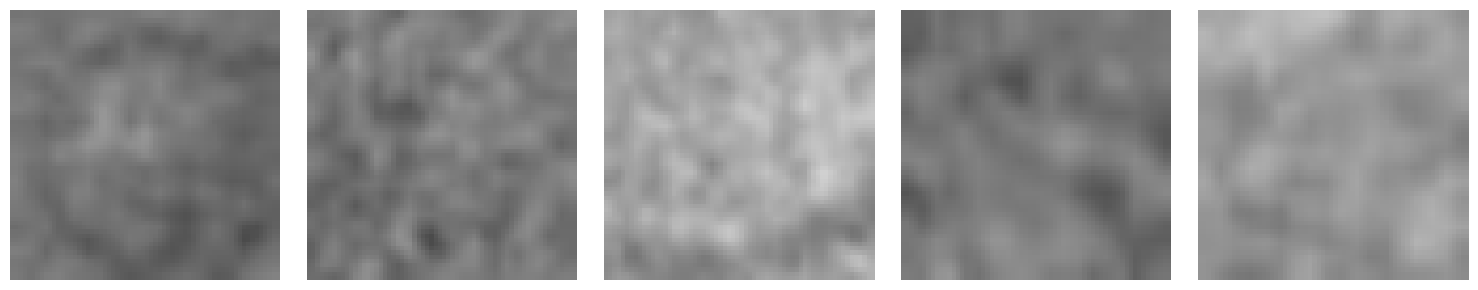

In [ ]:
class SimpleImageDataset(Dataset):
    def __init__(self, folder_path, df, transform):
        self.transform = transform
        self.folder_path = folder_path
        self.item_paths = []
        self.item_dict = {}
        self.ratio = []

        self.item_paths = [os.path.join(self.folder_path, i) for i in df["File Prefix1"]]
        self.ratio = df["Ratio"].values

    def __len__(self):
        return len(self.item_paths)

    def __getitem__(self, idx):
        image_path = self.item_paths[idx]
        pilr_image = Image.open(image_path).convert("RGB")
        tensor_image = self.transform(pilr_image)
        target = torch.tensor([self.ratio[idx]], dtype=torch.float32)
        return tensor_image, target

# Augmentation param
PX = 64 #画像のサイズ
TRAIN_NORMALIZE_PARAM = [0.494, 0.296, 0.197], [0.14,  0.114, 0.072]
TRAIN_CROP_SCALE =(0.75,1.0)
TRAIN_BRIGHTNESS_PARAM = 0.05
TRAIN_CONTRAST_PARAM = 0.05
TRAIN_SATURATION_PARAM = 0.05
TRAIN_RANDOM_ROTATION = 0
TRAIN_HUE_PARAM = 0.005
VAL_NORMALIZE_PARAM = [0.494, 0.296, 0.197], [0.14,  0.114, 0.072]

# Training param
PATIENCE = 30
EPOCH = 300
BATCH_SIZE = 64


# Update the transform compositions using v2
train_data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(PX, scale=TRAIN_CROP_SCALE, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=TRAIN_RANDOM_ROTATION),
    transforms.ColorJitter(brightness=TRAIN_BRIGHTNESS_PARAM,
                  contrast=TRAIN_CONTRAST_PARAM,
                  saturation=TRAIN_SATURATION_PARAM,
                  hue=TRAIN_HUE_PARAM),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    #transforms.Normalize(mean=TRAIN_NORMALIZE_PARAM[0], std=TRAIN_NORMALIZE_PARAM[1]),
])

val_data_transforms = transforms.Compose([
    transforms.Resize((PX, PX), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    #transforms.Normalize(mean=TRAIN_NORMALIZE_PARAM[0], std=TRAIN_NORMALIZE_PARAM[1]),
])




train_df = filtered_df.sample(frac=0.8, random_state=42)
val_df = filtered_df.drop(train_df.index)

train_dataset = SimpleImageDataset(cropped_img_dir, train_df, train_data_transforms)
val_dataset = SimpleImageDataset(cropped_img_dir, val_df, val_data_transforms)
test_dataset = SimpleImageDataset(cropped_img_dir, val_df, train_data_transforms)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(val_dataset, batch_size = 1, shuffle = False)


print("TRAIN_dataset_size：" + str(len(train_dataset)))
print("VAL_dataset_size：" + str(len(val_dataset)))
print("TEST_dataset_size：" + str(len(test_dataset)))


#水増し後の画像を表示
def show_img(dataset):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        plt.subplot(1, 5, i+1)

        # 軸と補助線を完全に非表示にする
        plt.axis('off')

        plt.imshow(image)
    plt.tight_layout()  # サブプロット間の間隔を自動調整


#画像の可視化
show_img(train_dataset)



In [ ]:
from torchvision.models import ResNet50_Weights

# class LaserSpotResNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # ResNet18をベースに転移学習 - pretrainedの代わりにweightsを使用
#         self.resnet = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
#         # 入力層を64x64x3に対応
#         self.resnet.conv1 = nn.Conv2d(3, 64, 7, stride=1, padding=3)
#         self.resnet.maxpool = nn.MaxPool2d(2, stride=2)
#         # 回帰のための出力層
#         self.resnet.fc = nn.Sequential(
#             nn.Linear(512, 128),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(128, 1)
#         )

#     def forward(self, x):
#         return self.resnet(x)

# class LaserSpotResNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # ResNet18をベースに転移学習
#         self.resnet = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
#         # 入力層を64x64x3に対応
#         self.resnet.conv1 = nn.Conv2d(3, 64, 7, stride=1, padding=3)
#         self.resnet.maxpool = nn.MaxPool2d(2, stride=2)

#         # 回帰のための出力層を改良
#         self.resnet.fc = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.BatchNorm1d(256),  # BatchNormを追加
#             nn.ReLU(),
#             nn.Dropout(0.3),      # 最初のDropoutは少し控えめに

#             nn.Linear(256, 128),
#             nn.BatchNorm1d(128),  # BatchNormを追加
#             nn.ReLU(),
#             nn.Dropout(0.5),      # 後ろの層ほどDropoutを強めに

#             nn.Linear(128, 1)
#         )

#     def forward(self, x):
#         return self.resnet(x)

class LaserSpotResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)

        self.gap = nn.AdaptiveAvgPool2d(1)

        # Dropoutを減らし、より単純な構造に
        self.regressor = nn.Sequential(
            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.1),  # 0.2→0.1に減少
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.gap(x)
        x = x.view(x.size(0), -1)

        return self.regressor(x)

# モデル定義
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ft = LaserSpotResNet().to(device)

# 学習設定 - 重複している最適化設定を統合
criterion = nn.MSELoss()


# ステップ数の計算
steps_per_epoch = len(train_loader)
total_steps = steps_per_epoch * EPOCH

optimizer = torch.optim.AdamW(
    model_ft.parameters(),
    lr=5e-5,  # 現状維持
    weight_decay=0.003,  # さらに少し軽減
    betas=(0.9, 0.999)
)

# エポック数を増やし、より緩やかな学習を実現
scheduler = lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=5e-4,  # 現状維持
    total_steps=total_steps,
    pct_start=0.4,  # warm-upをより長く
    anneal_strategy='cos',
    div_factor=10.0,
    final_div_factor=1e3
)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 157MB/s]


#**Modules**

In [ ]:
####################################
####################################
#Test with early-stopping
####################################
####################################

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss



def train_model(model, loss_func, batch_size, optimizer, patience, n_epochs, device):
    # steps_per_epochの計算
    steps_per_epoch = len(train_loader)
    total_steps = steps_per_epoch * n_epochs

    # OneCycleLRの設定
    scheduler = lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=1e-3,
        total_steps=total_steps,
        pct_start=0.3,
        anneal_strategy='cos',
        div_factor=25.0,
        final_div_factor=1e4
    )

    # AMP用のscalerを初期化
    scaler = torch.cuda.amp.GradScaler()

    # 損失の記録用リスト
    train_losses = []
    valid_losses = []
    avg_train_losses = []
    avg_valid_losses = []

    # early stoppingの初期化
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(1, n_epochs + 1):
        ###################
        # train the model #
        ###################
        model.train()
        running_corrects, train_acc = 0, 0

        for batch, (image_tensor, target) in enumerate(train_loader, 1):
            target = target.view(len(target), 1)

            image_tensor = image_tensor.to(device)
            target = target.to(device)

            # 勾配をゼロに初期化
            optimizer.zero_grad()

            # AMPを使用した順伝播
            with torch.cuda.amp.autocast():
                output = model(image_tensor)
                loss = loss_func(output, target)

            # AMPを使用した逆伝播
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            # OneCycleLRはバッチごとに更新
            scheduler.step()

            # 現在の学習率を記録
            current_lr = optimizer.param_groups[0]['lr']

            train_losses.append(loss.item())

        ######################
        # validate the model #
        ######################
        model.eval()
        running_corrects, val_acc = 0, 0

        with torch.no_grad():
            for image_tensor, target in val_loader:
                target = target.view(len(target), 1)

                image_tensor = image_tensor.to(device)
                target = target.to(device)

                # 評価時もAMPを使用
                with torch.cuda.amp.autocast():
                    output = model(image_tensor)
                    loss = loss_func(output, target)

                valid_losses.append(loss.item())

        # 平均損失の計算
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        epoch_len = len(str(n_epochs))
        print_msg = (f'Epoch: [{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +'\n'
                    f'train_loss: {train_loss:.5f} ' +'\n'
                    f'valid_loss: {valid_loss:.5f} ' +'\n'
                    f'learning_rate: {current_lr:.2e}')
        print(print_msg)

        # リストのクリア
        train_losses = []
        valid_losses = []

        # early stopping
        early_stopping(valid_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    # 最良のモデルを読み込み
    model.load_state_dict(torch.load('checkpoint.pt'))

    return model, avg_train_losses, avg_valid_losses



#**Train model & save network**

<ipython-input-13-3d6b27a29e72>:75: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-13-3d6b27a29e72>:103: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
<ipython-input-13-3d6b27a29e72>:134: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.

Epoch: [  1/300] 
train_loss: 1.73086 
valid_loss: 1.55614 
learning_rate: 4.03e-05
Validation loss decreased (inf --> 1.556136).  Saving model ...
Epoch: [  2/300] 
train_loss: 1.42377 
valid_loss: 1.43689 
learning_rate: 4.12e-05
Validation loss decreased (1.556136 --> 1.436890).  Saving model ...
Epoch: [  3/300] 
train_loss: 1.09459 
valid_loss: 1.16827 
learning_rate: 4.26e-05
Validation loss decreased (1.436890 --> 1.168273).  Saving model ...
Epoch: [  4/300] 
train_loss: 0.74667 
valid_loss: 0.87154 
learning_rate: 4.47e-05
Validation loss decreased (1.168273 --> 0.871537).  Saving model ...
Epoch: [  5/300] 
train_loss: 0.40796 
valid_loss: 0.36557 
learning_rate: 4.73e-05
Validation loss decreased (0.871537 --> 0.365569).  Saving model ...
Epoch: [  6/300] 
train_loss: 0.18299 
valid_loss: 0.16130 
learning_rate: 5.05e-05
Validation loss decreased (0.365569 --> 0.161299).  Saving model ...
Epoch: [  7/300] 
train_loss: 0.14787 
valid_loss: 0.23193 
learning_rate: 5.43e-05
Ear

<ipython-input-13-3d6b27a29e72>:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoint.pt'))


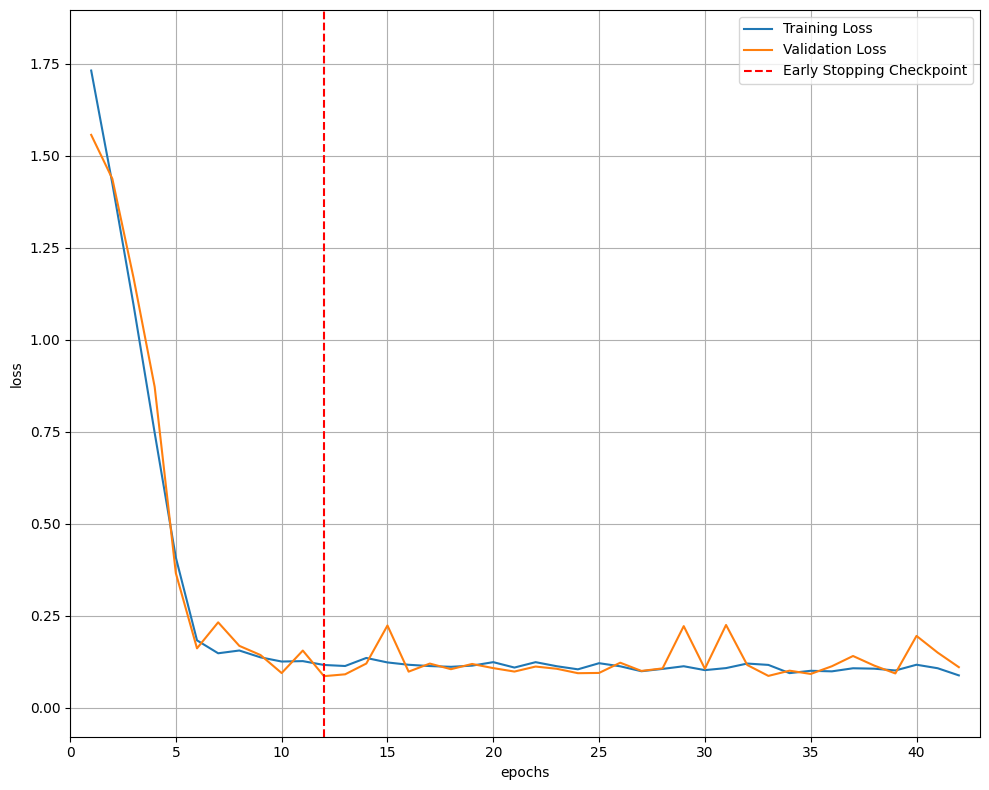

In [ ]:
model, train_loss, valid_loss = train_model(model_ft, criterion, BATCH_SIZE, optimizer, PATIENCE, EPOCH, device)

#ネットワークの保存
PATH = 'test.pth'
torch.save(model_ft.state_dict(), PATH)

# Drawing learning curves
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

# データの最小値と最大値を取得
min_loss = min(min(train_loss), min(valid_loss))
max_loss = max(max(train_loss), max(valid_loss))

# マージンを追加して少し余裕を持たせる（例：10%のマージン）
margin = (max_loss - min_loss) * 0.1
plt.ylim(min_loss - margin, max_loss + margin)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

Epoch: [  1/300] 
train_loss: 2.05789 
valid_loss: 1.42926 
learning_rate: 1.00e-04
Validation loss decreased (1.429258 --> 1.429258).  Saving model ...
Epoch: [  2/300] 
train_loss: 1.88138 
valid_loss: 1.54907 
learning_rate: 1.01e-04
Epoch: [  3/300] 
train_loss: 1.70986 
valid_loss: 1.61027 
learning_rate: 1.02e-04
Epoch: [  4/300] 
train_loss: 1.49091 
valid_loss: 1.47598 
learning_rate: 1.04e-04
Epoch: [  5/300] 
train_loss: 1.21302 
valid_loss: 1.68075 
learning_rate: 1.07e-04
Epoch: [  6/300] 
train_loss: 0.93586 
valid_loss: 2.03054 
learning_rate: 1.10e-04
Epoch: [  7/300] 
train_loss: 0.70828 
valid_loss: 2.58317 
learning_rate: 1.13e-04
Epoch: [  8/300] 
train_loss: 0.55213 
valid_loss: 1.24500 
learning_rate: 1.18e-04
Validation loss decreased (1.244999 --> 1.244999).  Saving model ...
Epoch: [  9/300] 
train_loss: 0.41097 
valid_loss: 0.89562 
learning_rate: 1.22e-04
Validation loss decreased (0.895616 --> 0.895616).  Saving model ...
Epoch: [ 10/300] 
train_loss: 0.35484

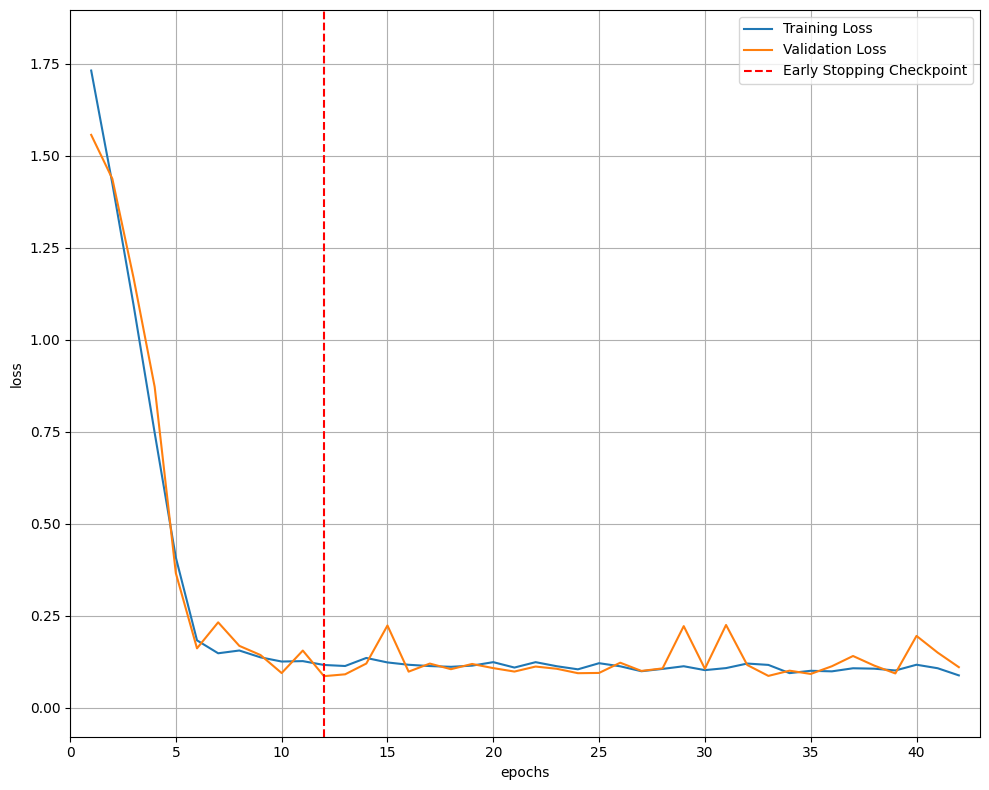

In [ ]:
#32pxバージョン

class SimpleImageDataset(Dataset):
    def __init__(self, folder_path, df, transform):
        self.transform = transform
        self.folder_path = folder_path
        self.item_paths = []
        self.item_dict = {}
        self.ratio = []

        self.item_paths = [os.path.join(self.folder_path, i) for i in df["File Prefix1"]]
        self.ratio = df["Ratio"].values

    def __len__(self):
        return len(self.item_paths)

    def __getitem__(self, idx):
        image_path = self.item_paths[idx]
        pilr_image = Image.open(image_path).convert("RGB")
        tensor_image = self.transform(pilr_image)
        target = torch.tensor([self.ratio[idx]], dtype=torch.float32)
        return tensor_image, target

# Augmentation param
PX = 32  # 入力サイズを32pxに変更
TRAIN_NORMALIZE_PARAM = [0.494, 0.296, 0.197], [0.14, 0.114, 0.072]
TRAIN_CROP_SCALE = (0.9, 1.0)  # より控えめなcrop
TRAIN_BRIGHTNESS_PARAM = 0.02   # より控えめな色変更
TRAIN_CONTRAST_PARAM = 0.02
TRAIN_SATURATION_PARAM = 0.02
TRAIN_RANDOM_ROTATION = 5      # 少しだけ回転を許可
TRAIN_HUE_PARAM = 0.002
VAL_NORMALIZE_PARAM = [0.494, 0.296, 0.197], [0.14, 0.114, 0.072]

# Training param
PATIENCE = 30
EPOCH = 300
BATCH_SIZE = 256  # バッチサイズを増加

# データ拡張の定義
train_data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(PX, scale=TRAIN_CROP_SCALE,
                               interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=TRAIN_RANDOM_ROTATION),
    transforms.ColorJitter(brightness=TRAIN_BRIGHTNESS_PARAM,
                         contrast=TRAIN_CONTRAST_PARAM,
                         saturation=TRAIN_SATURATION_PARAM,
                         hue=TRAIN_HUE_PARAM),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
])

val_data_transforms = transforms.Compose([
    transforms.Resize((PX, PX), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
])

# Early Stopping実装
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model = model.state_dict().copy()
            return False

        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model = model.state_dict().copy()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

        return self.early_stop

# モデル定義
class LaserSpotResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # 32x32の入力サイズに対応
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.resnet.maxpool = nn.Identity()  # maxpoolを無効化（小さな入力サイズのため）

        self.gap = nn.AdaptiveAvgPool2d(1)

        self.regressor = nn.Sequential(
            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.gap(x)
        x = x.view(x.size(0), -1)

        return self.regressor(x)

# データセットの分割
train_df = filtered_df.sample(frac=0.8, random_state=42)
val_df = filtered_df.drop(train_df.index)

train_dataset = SimpleImageDataset(cropped_img_dir, train_df, train_data_transforms)
val_dataset = SimpleImageDataset(cropped_img_dir, val_df, val_data_transforms)
test_dataset = SimpleImageDataset(cropped_img_dir, val_df, val_data_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ft = LaserSpotResNet().to(device)

# 損失関数と最適化の設定
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(
    model_ft.parameters(),
    lr=1e-4,
    weight_decay=0.001,
    betas=(0.9, 0.999)
)

# ステップ数の計算とスケジューラーの設定
steps_per_epoch = len(train_loader)
total_steps = steps_per_epoch * EPOCH

scheduler = lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,
    total_steps=total_steps,
    pct_start=0.3,
    anneal_strategy='cos',
    div_factor=10.0,
    final_div_factor=1e3
)

early_stopping = EarlyStopping(patience=PATIENCE, min_delta=1e-4)

# 学習ループ
def train_model(model, criterion, optimizer, scheduler, num_epochs=EPOCH):
    best_loss = float('inf')

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        val_loss = val_loss / len(val_loader.dataset)

        print(f'Epoch: [{epoch:3d}/{num_epochs}] \n'
              f'train_loss: {epoch_loss:.5f} \n'
              f'valid_loss: {val_loss:.5f} \n'
              f'learning_rate: {scheduler.get_last_lr()[0]:.2e}')

        # Early stopping check
        if early_stopping(val_loss, model):
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.best_model)
            break

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), 'checkpoint.pt')
            print(f'Validation loss decreased ({best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')

# 学習の実行
train_model(model_ft, criterion, optimizer, scheduler)

# モデルの読み込み
model_ft.load_state_dict(torch.load('checkpoint.pt', weights_only=True))

#ネットワークの保存
PATH = 'test.pth'
torch.save(model_ft.state_dict(), PATH)

# Drawing learning curves
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

# データの最小値と最大値を取得
min_loss = min(min(train_loss), min(valid_loss))
max_loss = max(max(train_loss), max(valid_loss))

# マージンを追加して少し余裕を持たせる（例：10%のマージン）
margin = (max_loss - min_loss) * 0.1
plt.ylim(min_loss - margin, max_loss + margin)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#**Evaluation using testset**

In [ ]:
PATH = 'test.pth'
model_ft.load_state_dict(torch.load(PATH))

<ipython-input-20-0d5ce215a03f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ft.load_state_dict(torch.load(PATH))


<All keys matched successfully>

#**Result analysis**

In [ ]:
import statistics

def my_round(x, d=0): #四捨五入
    p = 10 ** d
    return float(math.floor((x * p) + math.copysign(0.5, x)))/p


model_ft.eval() # prep model for evaluation

outputs,targets,errors =[], [], []
for image_tensor, target in test_loader:
      target = target.view(len(target), 1)
      image_tensor = image_tensor.to(device)
      target = target.to(device)
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model_ft(image_tensor)

      outputs.append((output[0]*100).item())
      targets.append((target[0]*100).item())
      #print('estimate R:'+str(my_round(output[0,0].item()))+'mm, L:'+str(my_round(output[0,1].item()))+'mm / target R:'+str(target[0,0].item())+'mm, L:'+str(target[0,1].item())+'mm')

      errors.append((output[0]*100).item()-(target[0]*100).item())

AbsError = [abs(i) for i in errors]

print('AveError: '+str(statistics.mean(errors)))
print('StdError: '+str(statistics.stdev(errors)))
print('AveAbsError: '+str(statistics.mean(AbsError)))
print('StdAbsError: '+str(statistics.stdev(AbsError)))


#平均からの差分を補正
corrected_output = (np.array(outputs)-np.array(statistics.mean(errors))).tolist()
corrected_error = (np.array(corrected_output)-np.array(targets)).tolist()
corrected_AbsError = [abs(i) for i in corrected_error]

round_output = [my_round(i) for i in outputs]
round_corrected_AbsError = [my_round(i) for i in corrected_AbsError]

print('Corrected_AveAbsError: '+str(statistics.mean(corrected_AbsError)))
print('Corrected_StdAbsError: '+str(statistics.stdev(corrected_AbsError)))


#csvを作成して保存
columns = ["result"]
index = ["AveError", "StdError", "AveAbsError", "StdAbsError", "Corrected_AveAbsError", "Corrected_StdAbsError"]
df = pd.DataFrame(index=index, columns=columns)
df.iloc[0:6, 0] =[statistics.mean(errors),statistics.stdev(errors),statistics.mean(AbsError),statistics.stdev(AbsError), statistics.mean(corrected_AbsError),statistics.stdev(corrected_AbsError)]
print(df)

PATH = 'test.csv'
df.to_csv(index=True)

AveError: -5.062866833940823
StdError: 30.054909636848542
AveAbsError: 21.868449752654264
StdAbsError: 21.175818248539446
Corrected_AveAbsError: 21.928296718557437
Corrected_StdAbsError: 20.494361662507703
                          result
AveError               -5.062867
StdError                30.05491
AveAbsError             21.86845
StdAbsError            21.175818
Corrected_AveAbsError  21.928297
Corrected_StdAbsError  20.494362


',result\nAveError,-5.062866833940823\nStdError,30.054909636848542\nAveAbsError,21.868449752654264\nStdAbsError,21.175818248539446\nCorrected_AveAbsError,21.928296718557437\nCorrected_StdAbsError,20.494361662507703\n'

<ipython-input-22-d49ee54860ec>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Figure size 640x480 with 0 Axes>

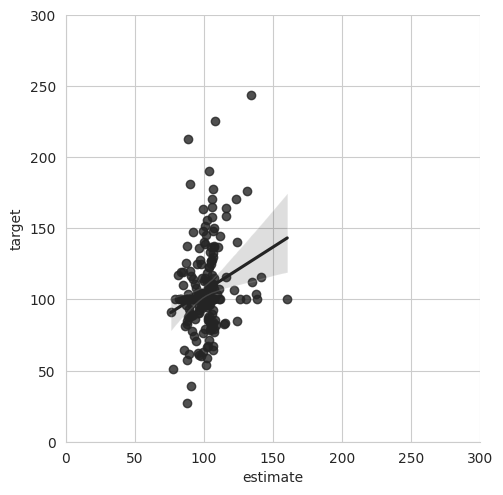

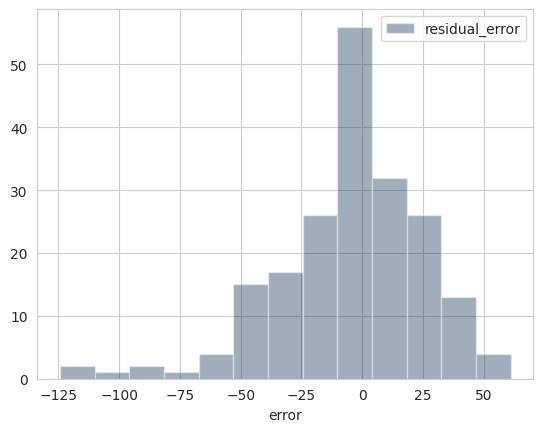

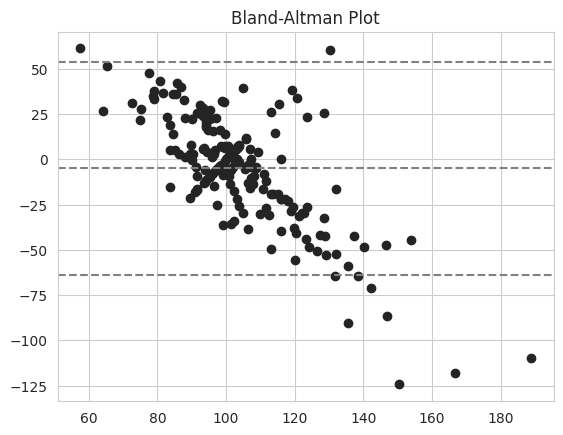

In [ ]:
import seaborn as sns

#Draw Graphs（散布図)
df = pd.DataFrame({'estimate':outputs, 'target':targets})


#Scatterplot
plt.figure()
sns.set_style('whitegrid')
sns.set_palette('gray')
figure = sns.lmplot(x='estimate', y='target', data=df)
plt.xlim(0,300)
plt.ylim(0,300)




PATH = 'test.png'
figure.savefig(PATH)



#Draw histogram
plt.figure()

df['error']=""
for i in range(len(df)):
    df.iloc[i,2] = df.iloc[i,0]-df.iloc[i,1]

sns.distplot(
    df['error'], bins=13, color='#123456', label='residual_error',
    kde=False,
    rug=False
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示



#Bland-Altman-Plot
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

bland_altman_plot(outputs, targets)
plt.title('Bland-Altman Plot')
plt.show()

#**結果をCSVファイルに記載**

In [ ]:
#result.csv作成（ファイルがなければ）
if os.path.exists(FILENAME_RESULTCSV) == False:
    df_result = df_labelcsv.copy()
else:
    print(FILENAME_RESULTCSV + " already exists!")

df_result = pd.read_csv(FILENAME_RESULTCSV, index_col=0)
print(df_result)


"""
################
#df_resultを初期化
################

df_result = df_labelcsv.copy()
df_result["set"] = "0"  #工程の列を追加

#valフォルダ内のファイル名を取得
train_data_path = glob.glob(DATASET_NAME + "/" + TRAIN_FOLDER_NAME+"/*")
val_data_path = glob.glob(DATASET_NAME + "/" + VAL_FOLDER_NAME+"/*")
test_data_path = glob.glob(DATASET_NAME + "/" + TEST_FOLDER_NAME+"/*")

for i in train_data_path:
    df_result.loc[df_result.iloc[:,0] == os.path.basename(i), "set"] = "train"
for i in val_data_path:
    df_result.loc[df_result.iloc[:,0] == os.path.basename(i), "set"] = "val"
for i in test_data_path:
    df_result.loc[df_result.iloc[:,0] == os.path.basename(i), "set"] = "test"

print(df_result)
"""

NameError: name 'FILENAME_RESULTCSV' is not defined

In [ ]:
# FILENAME_RESULTCSVとFILENAME_LABELCSVは文字列値として定義する必要があると仮定します
FILENAME_RESULTCSV = "/content/drive/MyDrive/Pixel_ComparisonPatient1auto1.5Mto2Y_Tracks_1_to_1004.csv"  # 目的の結果ファイル名に置き換えてください
FILENAME_LABELCSV = "studyresults.csv" # 目的のラベルファイル名に置き換えてください

#result.csv作成（ファイルがなければ）
import os
import pandas as pd

# label CSVを読み込むか、存在しない場合は空のDataFrameを作成します
try:
    df_labelcsv = pd.read_csv(FILENAME_LABELCSV, index_col=0)
except FileNotFoundError:
    print(f"ラベルCSVファイル '{FILENAME_LABELCSV}' が見つかりません。空のDataFrameを作成します。")
    df_labelcsv = pd.DataFrame() # label.csv が存在しない場合、空のデータフレームを作成します

if os.path.exists(FILENAME_RESULTCSV) == False:
    df_result = df_labelcsv.copy()
else:
    print(FILENAME_RESULTCSV + " は既に存在します!")

df_result = pd.read_csv(FILENAME_RESULTCSV, index_col=0)
print(df_result)

ラベルCSVファイル 'studyresults.csv' が見つかりません。空のDataFrameを作成します。
/content/drive/MyDrive/Pixel_ComparisonPatient1auto1.5Mto2Y_Tracks_1_to_1004.csv は既に存在します!
                                                        File Prefix2  \
File Prefix1                                                           
pt1_5_1.5M_AF_label0_track1.png        pt1_6_2Y_AF_label0_track1.png   
pt1_5_1.5M_AF_label0_track2.png        pt1_6_2Y_AF_label0_track2.png   
pt1_5_1.5M_AF_label0_track3.png        pt1_6_2Y_AF_label0_track3.png   
pt1_5_1.5M_AF_label0_track4.png        pt1_6_2Y_AF_label0_track4.png   
pt1_5_1.5M_AF_label0_track5.png        pt1_6_2Y_AF_label0_track5.png   
...                                                              ...   
pt1_5_1.5M_AF_label0_track1000.png  pt1_6_2Y_AF_label0_track1000.png   
pt1_5_1.5M_AF_label0_track1001.png  pt1_6_2Y_AF_label0_track1001.png   
pt1_5_1.5M_AF_label0_track1002.png  pt1_6_2Y_AF_label0_track1002.png   
pt1_5_1.5M_AF_label0_track1003.png  pt1_6_2Y_AF_label0_trac

In [ ]:
#Calculating result

#対象のパスからラベルを抜き出して表示
def getlabel(result_csv, image_name):
      image_name = image_name
      label = df_result[df_result.iloc[:,0] == image_name].iloc[0,1] #df_resultよりimage_nameが含まれる行を抜き出して年齢を取得
      return(image_name, label)


#評価のための画像下処理
def image_transform(image_path):
    image=Image.open(image_path)
    transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor()])
    image_tensor = transform(image)


    #バッチサイズの次元を先頭に追加した4Dテンソルに変換
    image_tensor.unsqueeze_(0)
    #print(image_tensor.size())  # torch.Size([1, 3, 224, 224])
    image_tensor = image_tensor.to(device) #model_ftをGPUに載せる

    return(image_tensor)


def my_round(x, d=0): #四捨五入
    p = 10 ** d
    return float(math.floor((x * p) + math.copysign(0.5, x)))/p


#モデルにした処理した画像を投入して予測結果を出力
def image_eval(image_tensor, model_ft):
    output = model_ft(image_tensor).item()*100
    return output

#result.csvに結果を記入
def write_result(df, image_name, pred, row):
    df.loc[df_result.iloc[:,0] == image_name, row] = pred  #df_resultよりimage_nameが含まれる行を抜き出して年齢を取得




#ここからがメイン
model_ft.eval() # prep model for evaluation

#valフォルダ内のファイル名を取得
train_data_path = glob.glob(DATASET_NAME + "/" + TRAIN_FOLDER_NAME+"/*")
val_data_path = glob.glob(DATASET_NAME + "/" + VAL_FOLDER_NAME+"/*")
test_data_path = glob.glob(DATASET_NAME + "/" + TEST_FOLDER_NAME+"/*")

data_path = [train_data_path, val_data_path, test_data_path]
k=0
for j in data_path:
    for i in j:
          image_name, label = getlabel(df_result, os.path.basename(i))  #画像の名前とラベルを取得
          image_tensor = image_transform(i)  #予測のための画像下処理
          pred = image_eval(image_tensor, model_ft)  #予測結果を出力
          write_result(df_result, image_name, pred, MODEL_NAME)
          print(str(k)+"/"+str(len(df_result)) + " images processed!")
          k+=1
print(df_result)

                                                        File Prefix2  \
File Prefix1                                                           
pt1_5_1.5M_AF_label0_track1.png        pt1_6_2Y_AF_label0_track1.png   
pt1_5_1.5M_AF_label0_track2.png        pt1_6_2Y_AF_label0_track2.png   
pt1_5_1.5M_AF_label0_track3.png        pt1_6_2Y_AF_label0_track3.png   
pt1_5_1.5M_AF_label0_track4.png        pt1_6_2Y_AF_label0_track4.png   
pt1_5_1.5M_AF_label0_track5.png        pt1_6_2Y_AF_label0_track5.png   
...                                                              ...   
pt1_5_1.5M_AF_label0_track1000.png  pt1_6_2Y_AF_label0_track1000.png   
pt1_5_1.5M_AF_label0_track1001.png  pt1_6_2Y_AF_label0_track1001.png   
pt1_5_1.5M_AF_label0_track1002.png  pt1_6_2Y_AF_label0_track1002.png   
pt1_5_1.5M_AF_label0_track1003.png  pt1_6_2Y_AF_label0_track1003.png   
pt1_5_1.5M_AF_label0_track1004.png  pt1_6_2Y_AF_label0_track1004.png   

                                    Pixels Prefix1  Pixels Pref

In [ ]:
import os
import glob
import pandas as pd
from PIL import Image
import torch
import torchvision.transforms as transforms
import math

# データセットのルートフォルダと各フォルダ名を定義
DATASET_NAME = "/content/drive/MyDrive/Dataset"
TRAIN_FOLDER_NAME = "train"
VAL_FOLDER_NAME = "val"
TEST_FOLDER_NAME = "test"

# モデルをデバイスに設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# `df_result` を事前に定義（ラベルファイルの読み込み）
FILENAME_RESULTCSV = "/content/drive/MyDrive/Pixel_ComparisonPatient1auto1.5Mto2Y_Tracks_1_to_1004.csv"
try:
    df_result = pd.read_csv(FILENAME_RESULTCSV, index_col=0)
except FileNotFoundError:
    df_result = pd.DataFrame(columns=["ID", "Prediction", "Confidence", "Model_Version"])

# ラベルを取得
def getlabel(result_csv, image_name):
    label_row = df_result[df_result.iloc[:, 0] == image_name]
    if not label_row.empty:
        return image_name, label_row.iloc[0, 1]  # ラベル取得
    return image_name, None  # ラベルがない場合

# 画像の前処理
def image_transform(image_path):
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze_(0).to(device)  # 4D tensor
    return image_tensor

# 予測の四捨五入
def my_round(x, d=0):
    p = 10 ** d
    return float(math.floor((x * p) + math.copysign(0.5, x))) / p

# モデルによる予測
def image_eval(image_tensor, model_ft):
    output = model_ft(image_tensor).item() * 100
    return output

# 結果を `df_result` に記録
def write_result(df, image_name, pred, row):
    df.loc[df.iloc[:, 0] == image_name, row] = pred

# モデルの評価モード
model_ft.eval()

# 各データフォルダのファイルリスト取得
train_data_path = glob.glob(os.path.join(DATASET_NAME, TRAIN_FOLDER_NAME, "*"))
val_data_path = glob.glob(os.path.join(DATASET_NAME, VAL_FOLDER_NAME, "*"))
test_data_path = glob.glob(os.path.join(DATASET_NAME, TEST_FOLDER_NAME, "*"))

data_path = [train_data_path, val_data_path, test_data_path]
k = 0

for j in data_path:
    for i in j:
        image_name, label = getlabel(df_result, os.path.basename(i))  # 画像の名前とラベル取得
        if label is not None:  # ラベルがある場合のみ処理
            image_tensor = image_transform(i)  # 画像の前処理
            pred = image_eval(image_tensor, model_ft)  # 予測結果
            write_result(df_result, image_name, pred, "Prediction")  # 結果を保存
            print(f"{k}/{len(df_result)} images processed!")
            k += 1

# `result.csv` に更新データを書き出し
df_result.to_csv(FILENAME_RESULTCSV, index=False)
print(df_result)


                                                        File Prefix2  \
File Prefix1                                                           
pt1_5_1.5M_AF_label0_track1.png        pt1_6_2Y_AF_label0_track1.png   
pt1_5_1.5M_AF_label0_track2.png        pt1_6_2Y_AF_label0_track2.png   
pt1_5_1.5M_AF_label0_track3.png        pt1_6_2Y_AF_label0_track3.png   
pt1_5_1.5M_AF_label0_track4.png        pt1_6_2Y_AF_label0_track4.png   
pt1_5_1.5M_AF_label0_track5.png        pt1_6_2Y_AF_label0_track5.png   
...                                                              ...   
pt1_5_1.5M_AF_label0_track1000.png  pt1_6_2Y_AF_label0_track1000.png   
pt1_5_1.5M_AF_label0_track1001.png  pt1_6_2Y_AF_label0_track1001.png   
pt1_5_1.5M_AF_label0_track1002.png  pt1_6_2Y_AF_label0_track1002.png   
pt1_5_1.5M_AF_label0_track1003.png  pt1_6_2Y_AF_label0_track1003.png   
pt1_5_1.5M_AF_label0_track1004.png  pt1_6_2Y_AF_label0_track1004.png   

                                    Pixels Prefix1  Pixels Pref

In [ ]:
#Resultファイルを書き出し
df_result.to_csv(FILENAME_RESULTCSV)